# Linear Algebra

- Installation requirements: `pip3 install rasterio Pillow`

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# new import statements
from sklearn.linear_model import LinearRegression

### Where do numpy arrays show up in ML?

- A `DataFrame` is just a matrix wihout column names or row indices

In [2]:
df = pd.DataFrame([[0, 2, 1], [2, 3, 4], [8, 5, 6]], columns=["x1", "x2", "y"])
df

,x1,x2,y
0,0,2,1
1,2,3,4
2,8,5,6


`df.values` gives us a `numpy.ndarray` of all the values.
`nd` stands for n-dimensional:
- 2-dimensional for matrix
- 1-dimensional for vector

In [3]:
print(type(df.values))
df.values

<class 'numpy.ndarray'>


array([[0, 2, 1],
       [2, 3, 4],
       [8, 5, 6]])

In [4]:
model = LinearRegression()
model.fit(df[["x1", "x2"]], df["y"])
model.coef_

array([-2.,  7.])

In [5]:
model.predict(df[["x1", "x2"]])

array([1., 4., 6.])

#### How does `predict` actually work?

- Matrix multiplication with coefficients (`@`) and add intercept

In [6]:
df[["x1", "x2"]].values @ model.coef_ + model.intercept_

array([1., 4., 6.])

### How to create numpy arrays from scratch?

- requires `import numpy as np`
    - `np.array(<object>)`: creates numpy array from object instance; documentation: https://numpy.org/doc/stable/reference/generated/numpy.array.html
    - `np.ones(<shape>)`: creates an array of ones; documentation: https://numpy.org/doc/stable/reference/generated/numpy.ones.html
    - `np.zeros(<shape>)`: creates an array of zeros; documentation: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html

In [7]:
np.array([7, 8, 9])

array([7, 8, 9])

In [8]:
np.ones(8)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
np.zeros(8)

array([0., 0., 0., 0., 0., 0., 0., 0.])

#### Review: `range()`

In [10]:
# 0 to exclusive end
# range(END)
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [11]:
# inclusive start to exclusive end
# range(START, END)
list(range(-4, 10))

[-4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
# inclusive start to exclusive end with a step between values
# default STEP is 1
# range(START, END, STEP)
list(range(-4, 10, 2))

[-4, -2, 0, 2, 4, 6, 8]

In [13]:
# range cannot have floats for the STEP
list(range(-4, 10, 0.5))

TypeError: 'float' object cannot be interpreted as an integer

#### Back to `numpy`
- `np.arange([start, ]stop, [step, ])`: gives us an array based on range; documentation: https://numpy.org/doc/stable/reference/generated/numpy.arange.html

In [14]:
# array range
np.arange(-4, 10, 0.5)   

array([-4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,
        1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,
        7. ,  7.5,  8. ,  8.5,  9. ,  9.5])

#### Review: Slicing

- `seq_object[<START>:<exclusive_END>:<STEP>]`
    - `<START>` is optional; default is index 0
    - `<END>` is optional; default is `len` of the sequence
- slicing creates a brand new object instance

In [15]:
# REVIEW: Python slicing of lists
a = [7, 8, 9, 10]
# slice out 8 and 10
b = a[1::2] 
b

[8, 10]

In [16]:
b[1] = 100
b

[8, 100]

In [17]:
# original object instance doesn't change
a

[7, 8, 9, 10]

Slicing is slow because of creating a new object instance.

#### How to slice `numpy` arrays? 
- Unlike regular slicing `numpy` slicing is very efficient - doesn't do a copy

In [18]:
a = np.array([7, 8, 9, 10])
# slice out 8 and 10
b = a[1::2]  
b

array([ 8, 10])

In [19]:
b[1] = 100
a

array([  7,   8,   9, 100])

How can you ensure that changes to a slice don't affect original `numpy.array`? Use `copy` method.

In [20]:
a = np.array([7, 8, 9, 10])
b = a.copy() # copy everything instead of sharing
b = a[1::2] 
b[1] = 100
b, a

(array([  8, 100]), array([  7,   8,   9, 100]))

#### Creating Multi-Dimensional Arrays

- using nested data structures like list of lists
- `shape` gives us the dimension of the `numpy.array`
- `len()` gives the first dimension, that is `shape[0]`

In [21]:
a = np.array([1, 2, 3])
a, len(a)

(array([1, 2, 3]), 3)

How many numbers are there in the below `tuple`?

In [22]:
a.shape

(3,)

One number in this `tuple`, and it is 3.

In [23]:
# 2-D array using list of lists
b = np.array([[1, 2, 3], [4, 5, 6]])
b

array([[1, 2, 3],
       [4, 5, 6]])

In [24]:
b.shape

(2, 3)

2 dimensional (because two numbers are there in this `tuple`). sizes 2 and 3 along those dimensions.

In [25]:
len(b)

2

#### How to reshape a `numpy.array`?

- `<obj>.reshape(<newshape>)`: reshapes the dimension of the array; documentation: https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

In [26]:
b

array([[1, 2, 3],
       [4, 5, 6]])

In [27]:
b.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [28]:
b.reshape(6)

array([1, 2, 3, 4, 5, 6])

We cannot add/remove values while reshaping.

In [29]:
b.reshape(5)

ValueError: cannot reshape array of size 6 into shape (5,)

In [30]:
b.reshape(7)

ValueError: cannot reshape array of size 6 into shape (7,)

-1 means whatever size is the necessary shape for the remaining values. Enables us to just control one of the dimensions.

In [31]:
b.reshape(3, -1)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [32]:
b.reshape(-1)

array([1, 2, 3, 4, 5, 6])

Generate a 10*10 with numbers from 0 to 99.

In [33]:
np.arange(100).reshape(10, -1)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

### Vocabulary
- scalar: 0 dimensional array
- vector: 1 dimensional array
- matrix: 2 dimensional array
- tensor: n dimensional (0, 1, 2, 3, ...) array 

### Images as Tensors

- `wget` command:
    - `wget <url> -O <local file name>`

In [34]:
# Only run this cell once
!wget "https://upload.wikimedia.org/wikipedia/commons/f/f2/Coccinella_magnifica01.jpg" -O bug.jpg

--2024-05-14 08:42:30--  https://upload.wikimedia.org/wikipedia/commons/f/f2/Coccinella_magnifica01.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2391153 (2.3M) [image/jpeg]
Saving to: ‘bug.jpg’

bug.jpg             100%[===================>]   2.28M  10.6MB/s    in 0.2s    

2024-05-14 08:42:30 (10.6 MB/s) - ‘bug.jpg’ saved [2391153/2391153]



#### How to read an image file?

- required `import matplotlib.pyplot as plt`
    - `plt.imread(<fname>)`: reads an image file into a 3-dimensional array --- rows(pixels), columns(pixels), colors (red/green/blue)
    - `plt.imshow(<array>, cmap=<color map>)`: displays the image

In [35]:
a = plt.imread("bug.jpg")
type(a)

numpy.ndarray

In [36]:
# 3-dimensional array
# rows(pixels), columns(pixels), colors (red/green/blue)
a.shape

(1688, 2521, 3)

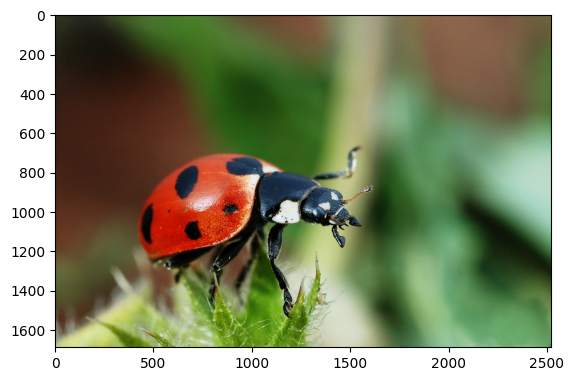

In [37]:
plt.imshow(a)

In [38]:
a 
# each inner array has 3-color representation R, G, B
# two color scales: floats (0.0 to 1.0) OR ints (0 to 255)

array([[[ 47,  52,  32],
        [ 41,  46,  26],
        [ 46,  49,  30],
        ...,
        [108,  95,  60],
        [111,  98,  63],
        [117, 104,  69]],

       [[ 43,  48,  28],
        [ 40,  45,  25],
        [ 44,  47,  28],
        ...,
        [112,  99,  64],
        [115, 102,  67],
        [114, 101,  66]],

       [[ 41,  46,  26],
        [ 42,  47,  27],
        [ 43,  46,  27],
        ...,
        [116, 103,  68],
        [114, 101,  66],
        [112,  97,  64]],

       ...,

       [[187, 193, 147],
        [189, 195, 149],
        [192, 198, 150],
        ...,
        [ 93, 131,  58],
        [ 92, 130,  55],
        [ 92, 130,  53]],

       [[190, 196, 150],
        [191, 197, 151],
        [192, 198, 150],
        ...,
        [ 94, 132,  57],
        [ 94, 130,  56],
        [ 91, 128,  51]],

       [[192, 198, 152],
        [191, 197, 151],
        [190, 196, 148],
        ...,
        [ 95, 131,  57],
        [ 93, 129,  55],
        [ 93, 130,  53]]

#### GOAL: crop down just to the bug using slicing

- `<array>[ROW SLICE, COLUMN SLICE, COLOR SLICE]`

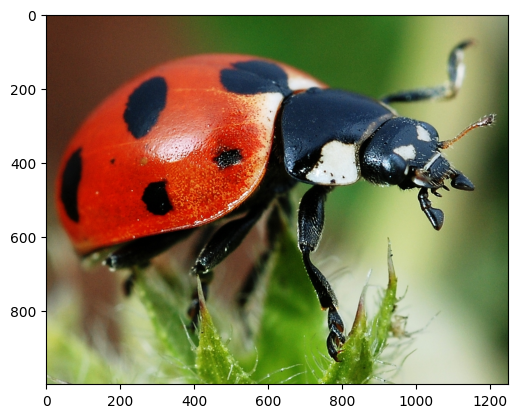

In [39]:
plt.imshow(a[600:1600, 400:1650, :])

#### GOAL: show clearly where RED is high on the image
- two formats:
    - 3D (row, column, color)
    - 2D (row, column) => black/white (red/blue)

In [40]:
a.shape

(1688, 2521, 3)

Pull out only layer 0, which is the red layer.
- 0 is red
- 1 is green
- 2 is blue

Use index only for the color dimension and slices for row and column dimensions

In [41]:
a[:, :, 0].shape 

(1688, 2521)

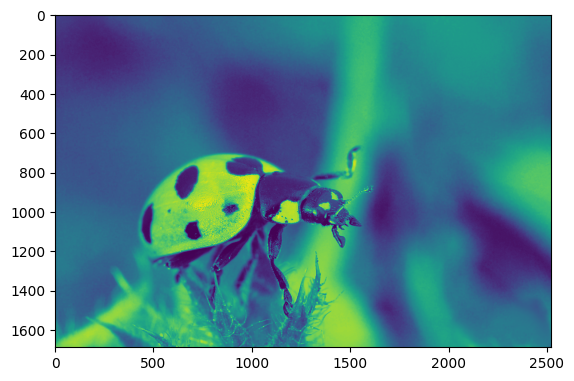

In [42]:
# instead of using black and white, 
# it is just assigning some color for light and dark
plt.imshow(a[:, :, 0])

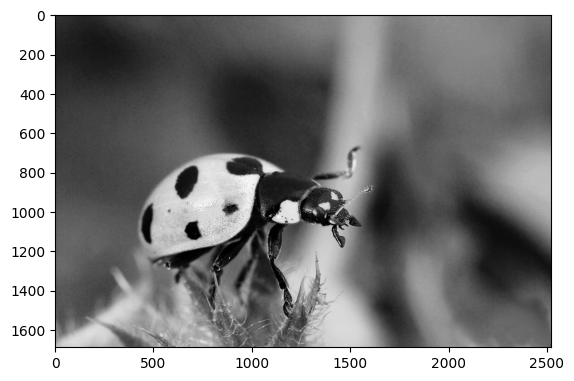

In [43]:
# better to use grayscale
plt.imshow(a[:, :, 0], cmap="gray")

Wherever there was red, the image is bright. The bug is very bright because of that. There are other places in the image that are bright but were not red. This is because when we mix RGB, we get white. Any color that was light will also have a lot of RED.

This could be a pre-processing step for some ML algorithm that can identify RED bugs. 

#### GOAL: show a grayscale that considers the average of all colors

- `<array>.mean(axis=<val>)`:
    - `axis` should be 0 for 1st dimension, 1 for 2nd dimension, 2 for 3rd dimension

In [44]:
# average over all the numbers
# gives a measure of how bright the image is overall
a.mean()

91.74619781513016

In [45]:
a.shape

(1688, 2521, 3)

In [46]:
# average over each column and color combination
a.mean(axis=0).shape

(2521, 3)

In [47]:
# average over each row and color combination
a.mean(axis=1).shape

(1688, 3)

In [48]:
# average over each row and column combination
a.mean(axis=2).shape

(1688, 2521)

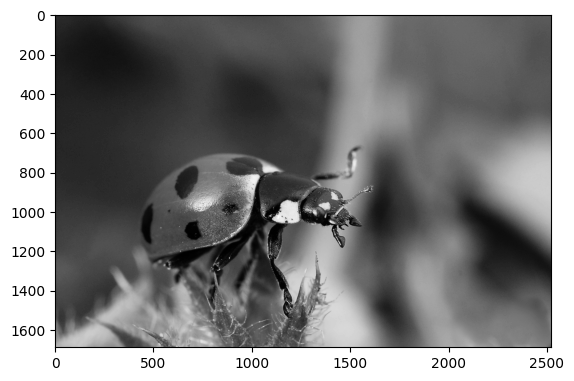

In [49]:
plt.imshow(a.mean(axis=2), cmap="gray")

This could also be a pre-processing step for some ML algorithm that expects black and white images.

### Vector Multiplication: Overview

#### Elementwise Multiplication

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}$

### Dot Product

$\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
\cdot
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}$

In [50]:
v1 = np.array([1, 2, 3]).reshape(-1, 1) # vertical shape
v1

array([[1],
       [2],
       [3]])

In [51]:
v2 = np.array([4, 5, 6]).reshape(-1, 1)
v2

array([[4],
       [5],
       [6]])

#### Elementwise Multiplication

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$
\=
$\begin{bmatrix}
4 \\ 10 \\ 18
\end{bmatrix}$

In [52]:
v1 * v2   # [1*4, 2*5, 3*6]

array([[ 4],
       [10],
       [18]])

#### Transpose

- flips the x and y

In [53]:
v2

array([[4],
       [5],
       [6]])

In [54]:
v2.T # horizontal

array([[4, 5, 6]])

In [55]:
v2.T.T # vertical

array([[4],
       [5],
       [6]])

In [56]:
v1.shape

(3, 1)

In [57]:
v2.T.shape

(1, 3)

#### Elementwise Multiplication

$\begin{bmatrix}
1 \\ 2 \\ 3
\end{bmatrix}
*
\begin{bmatrix}
4 & 5 & 6
\end{bmatrix}$
\=
?

In [58]:
v1 * v2.T # how is this working?

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

### Broadcast

Two use cases:
1. "stretch" 1 => N along any dimension to make shapes compatible
2. add dimensions of size 1 to the beginning of a shape

Element-wise operation between `v1 * v2.T` will automatically "Broadcast" v1 to 3 x 3 (stretching the second dimension) and "Broadcast" v2.T to 3 x 3 (stretching the first dimension).

In [59]:
v1.shape

(3, 1)

In [60]:
v2.T.shape

(1, 3)

How can we manually replicate that? 

#### `np.concatenate([a1, a2, ...], axis=0)`.
- `a1, a2, …`: sequence of arrays
- `axis`: the dimension along with we want to join the arrays
    - default value is 0, which is for row dimension (down)
    - value of 1 is for column dimension (across)

In [61]:
v1

array([[1],
       [2],
       [3]])

In [62]:
v1.shape

(3, 1)

In [63]:
# Broadcast v1 to 3 x 3 (stretching the second dimension)
v1_broadcast = np.concatenate([v1, v1, v1], axis=1)
v1_broadcast

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [64]:
v2.T

array([[4, 5, 6]])

In [65]:
v2.T.shape

(1, 3)

In [66]:
# Broadcast v2.T to 3 x 3 (stretching the second dimension)
v2t_broadcast = np.concatenate([v2.T, v2.T, v2.T], axis=0)
v2t_broadcast

array([[4, 5, 6],
       [4, 5, 6],
       [4, 5, 6]])

In [67]:
v1_broadcast * v2t_broadcast # same as v1 * v2.T

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [68]:
v1 * v2.T

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

#### Generate a multiplication table from 1 to 10

In [69]:
# 1. generate a range of numbers from 1 to 10
# 2. reshape that to a vertical numpy array
digits = np.arange(1, 11).reshape(-1, 1)
digits

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [70]:
digits * digits.T

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]])

In [71]:
# Convert the multiplication table into a DataFrame
pd.DataFrame(digits * digits.T, columns=digits.reshape(-1), index=digits.reshape(-1))

,1,2,3,4,5,6,7,8,9,10
1,1,2,3,4,5,6,7,8,9,10
2,2,4,6,8,10,12,14,16,18,20
3,3,6,9,12,15,18,21,24,27,30
4,4,8,12,16,20,24,28,32,36,40
5,5,10,15,20,25,30,35,40,45,50
6,6,12,18,24,30,36,42,48,54,60
7,7,14,21,28,35,42,49,56,63,70
8,8,16,24,32,40,48,56,64,72,80
9,9,18,27,36,45,54,63,72,81,90
10,10,20,30,40,50,60,70,80,90,100


#### Back to bug example

Let's do more complex broadcasting example

In [72]:
# Read "bug.jpg" into a numpy array
a = plt.imread("bug.jpg")
a.shape

(1688, 2521, 3)

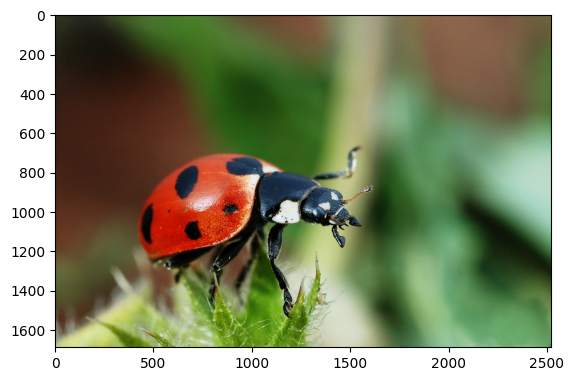

In [73]:
# Display "bug.jpg"
plt.imshow(a)

#### GOAL: create a fade effect (full color on the left, to black on the right)

- To achieve this, we need to:
    1. multiply the left most columns with numbers close to 1's (retains the original color)
    2. the rightmost columns with numbers close to 0's (0 will give us black color)
    3. the middle columns with numbers close to 0.5's

In [74]:
a.shape

(1688, 2521, 3)

In [75]:
# Create an array called fade with 2521 numbers
fade = 1 - np.arange(2521) / 2521
print(fade.shape)
fade
# How many dimensions does fade have? 1

(2521,)


array([1.00000000e+00, 9.99603332e-01, 9.99206664e-01, ...,
       1.19000397e-03, 7.93335978e-04, 3.96667989e-04])

In [76]:
a.shape

(1688, 2521, 3)

How can we multiply `a` and `fade`? That is how do we `reshape` `fade`?

Can we reshape fade to 1688 x 2521 x 3?

In [77]:
fade.reshape(1688, 2521, 3)

ValueError: cannot reshape array of size 2521 into shape (1688,2521,3)

The answer is no - because `reshape` can never add new values / delete values. Meaning after `reshape`, we need to exactly have 2521 values.

In [78]:
# Keep in mind that we need to multiple each column by a number, so which dimension should
# be 2521?
fade.reshape(1, 2521, 1)

array([[[1.00000000e+00],
        [9.99603332e-01],
        [9.99206664e-01],
        ...,
        [1.19000397e-03],
        [7.93335978e-04],
        [3.96667989e-04]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


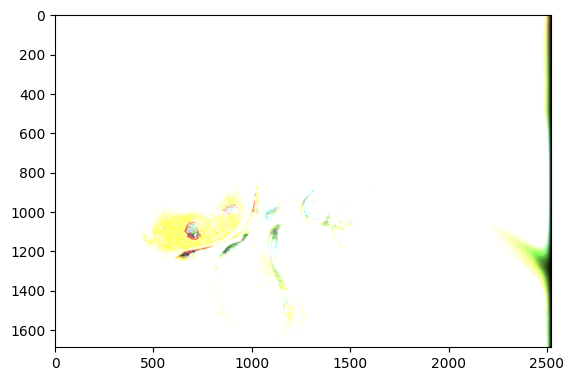

In [79]:
# Let's multiple a by reshaped fade
plt.imshow(a * fade.reshape(1, 2521, 1))

Why doesn't this work? Remember pixels can be either represented using the values 0 to 255 or 0 to 1. `a` has the scale 0 to 255 and `fade.reshape(...)` has the scale 0 to 1.

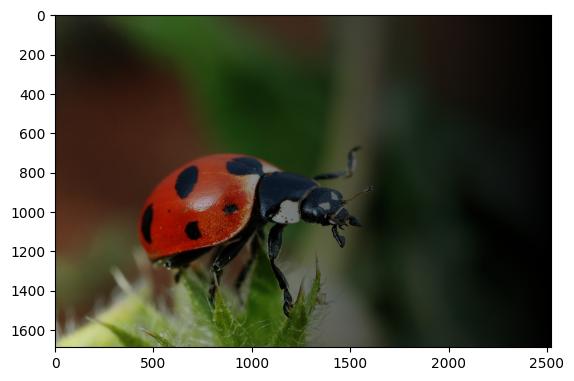

In [80]:
plt.imshow(a / 255.0 * fade.reshape(1, 2521, 1))

### Broadcast

Two use cases:
1. "stretch" 1 => N along any dimension to make shapes compatible
2. add dimensions of size 1 to the beginning of a shape

In [81]:
a.shape

(1688, 2521, 3)

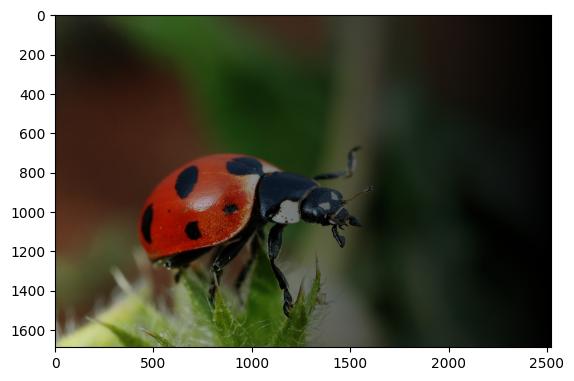

In [82]:
plt.imshow(a / 255.0 * fade.reshape(2521, 1))
# BROADCAST: (2521, 1) => (1, 2521, 1) => (1688, 2521, 3)

### Dot Product

$\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
\cdot
\begin{bmatrix}
4 \\ 5 \\ 6
\end{bmatrix}$

In [83]:
v1

array([[1],
       [2],
       [3]])

In [84]:
v2

array([[4],
       [5],
       [6]])

In [85]:
v1 * v2   # 1*4, 2*5, 3*6

array([[ 4],
       [10],
       [18]])

In [86]:
v1.T

array([[1, 2, 3]])

In [87]:
v2

array([[4],
       [5],
       [6]])

#### `np.dot(a1, a2)` or `a1 @ a2`

In [88]:
np.dot(v1.T, v2)   # 1*4 + 2*5 + 3*6

array([[32]])

In [89]:
v1.T @ v2

array([[32]])

#### `.item()` gives you just the values

In [90]:
(v1.T @ v2).item()   # pulls out the only number in the results

32

In [91]:
np.dot(v1.T, v2).item()

32

### Problem 1: Predicting with dot product (given `X` and `c`, compute `y`)

1. use case for dot product:
    - `y = Xc + b`
2. one's column
3. matrix dot vector

$\begin{bmatrix}
1 & 2 \\ 3 & 4\\
\end{bmatrix}
\cdot
\begin{bmatrix}
10 \\ 1 \\
\end{bmatrix}$

In [92]:
houses = pd.DataFrame([[2, 1, 1985],
                       [3, 1, 1998],
                       [4, 3, 2005],
                       [4, 2, 2020]],
                      columns=["beds", "baths", "year"])
houses

,beds,baths,year
0,2,1,1985
1,3,1,1998
2,4,3,2005
3,4,2,2020


In [93]:
def predict_price(house):
    """
    Takes row (as Series) as argument,
    returns estimated price (in thousands)
    """
    return ((house["beds"]*42.3) + (house["baths"]*10) + 
            (house["year"]*1.67) - 3213)

predict_price(houses.iloc[0])

196.54999999999973

In [94]:
# How do we convert a DataFrame into a numpy array?
X = houses.values
X

array([[   2,    1, 1985],
       [   3,    1, 1998],
       [   4,    3, 2005],
       [   4,    2, 2020]])

Simplifying intercept addition by including intercept inside `c` vector.

In [95]:
# Extract just first row of data
house0 = X[0:1, :]
house0

array([[   2,    1, 1985]])

In [96]:
# Create a vertical array (3 x 1) with the co-efficients
c = np.array([42.3, 10, 1.67]).reshape(-1, 1)
c

array([[42.3 ],
       [10.  ],
       [ 1.67]])

In [97]:
# horizontal @ vertical
house0 @ c

array([[3409.55]])

`y = Xc + b`

In [98]:
house0 @ c - 3213

array([[196.55]])

Let's add the intercept to the c vector for ease.

In [99]:
c = np.array([42.3, 10, 1.67, -3213]).reshape(-1, 1)
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

In [100]:
house0 @ c

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

In [101]:
house0.shape

(1, 3)

In [102]:
c.shape

(4, 1)

#### One's column

- Solution, add a 1's column to `X` using `np.concatenate`

In [103]:
# How can we generate an array of 1's using numpy?
ones_column = np.ones(4).reshape(-1, 1)
ones_column
# Adding one's column to X
X = np.concatenate([X, ones_column], axis=1)
X

array([[2.000e+00, 1.000e+00, 1.985e+03, 1.000e+00],
       [3.000e+00, 1.000e+00, 1.998e+03, 1.000e+00],
       [4.000e+00, 3.000e+00, 2.005e+03, 1.000e+00],
       [4.000e+00, 2.000e+00, 2.020e+03, 1.000e+00]])

In [104]:
# Let's extract house0 again
house0 = X[0:1, :]
house0

array([[2.000e+00, 1.000e+00, 1.985e+03, 1.000e+00]])

In [105]:
# Let's try house0 @ c now
house0 @ c

array([[196.55]])

In [106]:
# Extracting each house and doing the prediction with dot product
# Cumbersome
house0 = X[0:1, :]
print(house0 @ c)
house1 = X[1:2, :]
print(house1 @ c)
house2 = X[2:3, :]
print(house2 @ c)
house3 = X[3:4, :]
print(house3 @ c)

[[196.55]]
[[260.56]]
[[334.55]]
[[349.6]]


### `@` use cases

loops over each row of the firt array and computes dot product, which is ROW @ COEFs, that is, `X @ c`

In [107]:
X @ c

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

### Problem 2: Fitting with `np.linalg.solve` (given `X` and `y`, find `c`)

**Above:** we estimated house prices using a linear model based on the dot product as follows:

$Xc = y$

* $X$ (known) is a matrix with house features (from DataFrame)
* $c$ (known) is a vector of coefficients (our model parameters)
* $y$ (computed) are the prices

**Below:** what if X and y are known, and we want to find c?

In [108]:
houses = pd.DataFrame([[2, 1, 1985, 196.55],
                       [3, 1, 1998, 260.56],
                       [4, 3, 2005, 334.55],
                       [4, 2, 2020, 349.60]],
                      columns=["beds", "baths", "year", "price"])
houses

,beds,baths,year,price
0,2,1,1985,196.55
1,3,1,1998,260.56
2,4,3,2005,334.55
3,4,2,2020,349.60


If we assume price is linearly based on the features, with this equation:

* $beds*c_0 + baths*c_1 + year*c_2 + 1*c_3 = price$

Then we get four equations:

* $2*c_0 + 1*c_1 + 1985*c_2 + 1*c_3 = 196.55$
* $3*c_0 + 1*c_1 + 1998*c_2 + 1*c_3 = 260.56$
* $4*c_0 + 3*c_1 + 2005*c_2 + 1*c_3 = 334.55$
* $4*c_0 + 2*c_1 + 2020*c_2 + 1*c_3 = 349.60$


#### `c = np.linalg.solve(X, y)`

- documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html

In [109]:
# Add a column of 1s to this DataFrame
houses["ones"] = 1
houses

,beds,baths,year,price,ones
0,2,1,1985,196.55,1
1,3,1,1998,260.56,1
2,4,3,2005,334.55,1
3,4,2,2020,349.60,1


In [110]:
# Extract X ---> features: ["beds", "baths", "year", "ones"]
X = houses[["beds", "baths", "year", "ones"]].values
X

array([[   2,    1, 1985,    1],
       [   3,    1, 1998,    1],
       [   4,    3, 2005,    1],
       [   4,    2, 2020,    1]])

In [111]:
# Extract y ---> prediction value: ["price"]
# Unlike predict method argument, we need a DataFrame here, 
# Reason: so that we can convert that into numpy array
y = houses[["price"]].values
y

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

In [112]:
# Let's take a look at the co-efficients which we were using for our prediction
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

In [113]:
c = np.linalg.solve(X, y)
c

array([[ 4.230e+01],
       [ 1.000e+01],
       [ 1.670e+00],
       [-3.213e+03]])

In [114]:
X @ c

array([[196.55],
       [260.56],
       [334.55],
       [349.6 ]])

What is the predicted price of a 6-bedroom 5-bathroom house built in 2024?

In [115]:
dream_house = np.array([[6, 5, 2024, 1]])
dream_house

array([[   6,    5, 2024,    1]])

In [116]:
dream_house @ c

array([[470.88]])

### Two Perspectives on `Matrix @ vector`

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
= ????
$

In [117]:
X = np.array([[4, 5], [6, 7], [8, 9]])
c = np.array([2, 3]).reshape(-1, 1)
X @ c

array([[23],
       [33],
       [43]])

### Row Picture

Do dot product one row at a time.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
(4*2)+(5*3)\\
(6*2)+(7*3)\\
(8*2)+(9*3)\\
\end{bmatrix}
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$

In [118]:
def row_dot_product(X, c):
    """
    function that performs same action as @ operator
    """
    result = []
    # loop over each row index of X
    for row_idx in range(X.shape[0]):
        # extract each row using slicing
        # why slicing? we want two dimensional array
        row = X[row_idx:row_idx+1, :]
        # DOT PRODUCT the row with c
        result.append((row @ c).item())
    # convert result into a vertical numpy array
    return np.array(result).reshape(-1, 1)
    
row_dot_product(X, c)

array([[23],
       [33],
       [43]])

In [119]:
X.shape

(3, 2)

### Column Picture

$\begin{bmatrix}
c_0&c_1&c_2\\
\end{bmatrix}
\cdot
\begin{bmatrix}
x\\y\\z\\
\end{bmatrix}
=(c_0*x) + (c_1*y) + (c_2*z)
$

Dot product takes a **linear combination** of columns.

$\begin{bmatrix}
4&5\\6&7\\8&9\\
\end{bmatrix}
\cdot
\begin{bmatrix}
2\\3\\
\end{bmatrix}
=
\begin{bmatrix}
4\\6\\8\\
\end{bmatrix}*2
+
\begin{bmatrix}
5\\7\\9\\
\end{bmatrix}*3
=
\begin{bmatrix}
23\\
33\\
43\\
\end{bmatrix}
$

In [120]:
def col_dot_product(X, c):
    """
    same result as row_dot_product above, 
    but different definition / code
    """
    # initialize a vertical vector of zeros
    total = np.zeros(X.shape[0]).reshape(-1, 1)
    # loop over each col index of X
    for col_idx in range(X.shape[1]):
        # extract each column using slicing
        col = X[:, col_idx:col_idx+1]
        # extract weight for the column using indexing
        weight = c[col_idx, 0]
        # add weighted column to total
        total += col * weight
    return total
    
col_dot_product(X, c)

array([[23.],
       [33.],
       [43.]])

In [121]:
X.shape

(3, 2)

In [122]:
# Create a vertical vector / array containing 3 0's
np.zeros(3).reshape(-1, 1)

array([[0.],
       [0.],
       [0.]])

### Part 1: Column Space of a Matrix

Definition: the *column space* of a matrix is the set of all linear combinations of that matrix's columns.

In [123]:
A = np.array([
    [1, 100],
    [2, 10],
    [3, 0]
])
B = np.array([
    [1, 0],
    [0, 2],
    [0, 3],
    [0, 0]
])

In [124]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([1, 1]).reshape(-1, 1)

array([[101],
       [ 12],
       [  3]])

In [125]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([-1, 0]).reshape(-1, 1)

array([[-1],
       [-2],
       [-3]])

In [126]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([0, 2]).reshape(-1, 1)

array([[200],
       [ 20],
       [  0]])

In [127]:
# this is in the column space of A (it's a weighted mix of the columns)
A @ np.array([0, 0]).reshape(-1, 1)

array([[0],
       [0],
       [0]])

A right-sized zero vector will always be in the column space.

What vectors are in the column space of B?

$B = \begin{bmatrix}
1&0\\
0&2\\
0&3\\
0&0\\
\end{bmatrix}$

$a=\begin{bmatrix}
2\\
2\\
3\\
0
\end{bmatrix}, b=\begin{bmatrix}
0\\
0\\
0\\
1
\end{bmatrix}, c=\begin{bmatrix}
-10\\
0\\
0\\
0
\end{bmatrix}, d=\begin{bmatrix}
0\\
-2\\
3\\
0
\end{bmatrix}, e=\begin{bmatrix}
-1\\
2\\
3\\
0
\end{bmatrix}$

In [128]:
c = np.array([-1, 1]).reshape(-1, 1) # coef
B @ c

array([[-1],
       [ 2],
       [ 3],
       [ 0]])

### Solution
- in the column space of B: 
    - a [2, 1]
    - c [-10, 0]
    - e [-1, 1]
- not in the column space: 
    - b (no weighting of 0 and 0 can make a 1)
    - d (if you multiple 2 and 3 by the same constant, the sign will be the same)

### Part 2: When can we solve for c?

Suppose $Xc = y$.

$X$ and $y$ are known, and we want to solve for $c$.

When does `c = np.linalg.solve(X, y)` work?

#### Fruit Sales Example

##### Data

* `10 apples and 0 bananas sold for $7`
* `2 apples and 8 bananas sold for $5`
* `4 apples and 4 bananas sold for $5`

##### Equations

* `10*apple + basket = 7`
* `2*apple + 8*banana + basket = 5`
* `4*apple + 4*banana + basket = 5`

#### There is a solution for the system of equations and `np.linalg.solve` can find it.

In [129]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
])
y = np.array([7, 5, 5]).reshape(-1, 1)

c = np.linalg.solve(X, y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

In [130]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1]])

In [131]:
np.array([[ 4,  4,  1]]) @ c

array([[5.]])

In [132]:
np.array([[ 5,  5,  1]]) @ c

array([[5.75]])

#### There is a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it.

- mathematically solvable

In [133]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    # adding the new combination
    [5, 5, 1],
])
y = np.array([7, 5, 5, 5.75]).reshape(-1, 1)

c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

### Equivalent statements

* there is a solution for the system of equations and `np.linalg.solve` can find it
* there is a solution for $c$ (in $Xc = y$), even if `np.linalg.solve` can't find it
* $y$ is in the column space of $X$

### Problem with most tables

More rows than columns in our dataset means more equations than variables.

This *usually* means that:

The equations aren't solvable, and y isn't in the column space of X.

In [134]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [ 5,  5,  1]])

In [135]:
y

array([[7.  ],
       [5.  ],
       [5.  ],
       [5.75]])

Dot product both sides by `X.T` ---> this will usually make it solvable.

In [136]:
c = np.linalg.solve(X.T @ X, X.T @ y)
c

array([[0.5 ],
       [0.25],
       [2.  ]])

What is special about dot product of a matrix with its transpose? Resultant shape is always a square.

In [137]:
(X.T @ X).shape

(3, 3)

**IMPORTANT**: We are not going to discuss how dot product works between two matrices. That is beyond the scope of CS320.

### Part 3: Projection Matrix

Say X and y are known, but we can't solve for c because X has more rows than columns:

### <font color='red'>$Xc = y$</font>

We can, however, usually (unless there are multiple equally good solutions) solve the following, which we get by multiplying both sides by $X^T$:

### <font color='red'>$X^TXc = X^Ty$</font>

If we can find a c to make the above true, we can multiple both sides by $(X^TX)^{-1}$ (which generally exists unless X columns are redundant) to get this equation:

$(X^TX)^{-1}X^TXc = (X^TX)^{-1}X^Ty$

Simplify:

$c = (X^TX)^{-1}X^Ty$

Multiply both sides by X:

### <font color='red'>$Xc = X(X^TX)^{-1}X^Ty$</font>

### Note we started with an unsolveable $Xc = y$ problem but multiplied $y$ by something to get a different $Xc = ????$ that is solveable.

Define <font color="red">$P = X(X^TX)^{-1}X^T$</font>.  This is a **projection matrix**.  If you multiply a vector by $P$, you get back a new vector of the same size, with two properties:

1. it will be in the column space of $X$
2. the new vector will be as "close" as possible to the original vector

Note: computing P is generally very expensive.

### Fruit Sales Example

In [138]:
X = np.array([
    [10, 0, 1],
    [2, 8, 1],
    [4, 4, 1],
    [10, 4, 1],
    [10, 4, 1]
])
y = np.array([7, 5, 5, 8, 8.5]).reshape(-1, 1)
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

In [139]:
c = np.linalg.solve(X, y)
c

LinAlgError: Last 2 dimensions of the array must be square

Multiply both sides by `X.T` ---> this will usually make it solvable.

In [140]:
c = np.linalg.solve(X.T @ X, X.T @ y)
c

array([[0.54861111],
       [0.29861111],
       [1.55555556]])

What is special about multiplication of a matrix with its transpose? Resultant shape is always a square.

In [141]:
X.T.shape

(3, 5)

In [142]:
X.shape

(5, 3)

In [143]:
(X.T @ X).shape

(3, 3)

Let's compute $P = X(X^TX)^{-1}X^T$.

- **IMPORTANT**: We are not going to discuss how inverse works. That is beyond the scope of CS320.

### `np.linalg.inv(a)`

- computes the (multiplicative) inverse of a matrix.
- documentation: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html

In [144]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[ 0.75      , -0.25      ,  0.33333333,  0.08333333,  0.08333333],
       [-0.25      ,  0.75      ,  0.33333333,  0.08333333,  0.08333333],
       [ 0.33333333,  0.33333333,  0.55555556, -0.11111111, -0.11111111],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222],
       [ 0.08333333,  0.08333333, -0.11111111,  0.47222222,  0.47222222]])

In [145]:
X

array([[10,  0,  1],
       [ 2,  8,  1],
       [ 4,  4,  1],
       [10,  4,  1],
       [10,  4,  1]])

In [146]:
y

array([[7. ],
       [5. ],
       [5. ],
       [8. ],
       [8.5]])

In [147]:
P @ y

array([[7.04166667],
       [5.04166667],
       [4.94444444],
       [8.23611111],
       [8.23611111]])

#### Scatter plot visualization

**IMPORTANT**: We are not going to discuss how `np.random.normal` works. You can look up the documentation if you are interested.

In [148]:
x = np.random.normal(5, 2, size=(10, 1))
y = 2*x + np.random.normal(size=x.shape)
df = pd.DataFrame({"x": x.reshape(-1), "y": y.reshape(-1)})
df

,x,y
0,4.578557,9.255376
1,4.895383,8.006977
2,5.426204,13.842906
3,3.599813,7.473849
4,1.414003,2.902096
5,2.961394,6.606022
6,1.958292,4.327438
7,6.421159,13.732309
8,7.121542,14.143223
9,3.650799,6.957454


<Axes: xlabel='x', ylabel='y'>

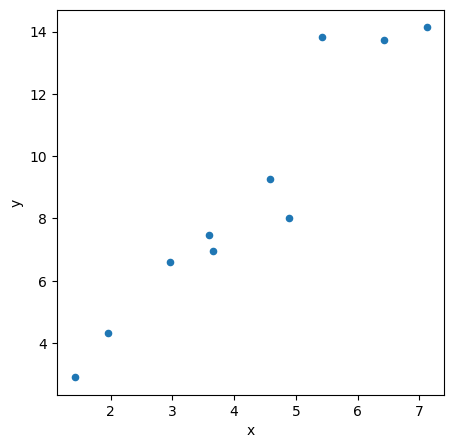

In [149]:
df.plot.scatter(x="x", y="y", figsize=(5, 5))

In [150]:
X = df[["x"]].values
X

array([[4.57855676],
       [4.89538338],
       [5.42620374],
       [3.59981336],
       [1.41400282],
       [2.96139412],
       [1.95829211],
       [6.42115946],
       [7.12154233],
       [3.65079929]])

In [151]:
P = X @ np.linalg.inv(X.T @ X) @ X.T
P

array([[0.10116855, 0.1081692 , 0.1198983 , 0.07954207, 0.03124404,
        0.06543546, 0.04327075, 0.14188301, 0.15735878, 0.08066867],
       [0.1081692 , 0.11565429, 0.12819501, 0.08504622, 0.03340606,
        0.06996345, 0.04626499, 0.15170102, 0.16824768, 0.08625077],
       [0.1198983 , 0.12819501, 0.14209556, 0.09426802, 0.03702838,
        0.07754979, 0.05128164, 0.16815039, 0.18649126, 0.09560319],
       [0.07954207, 0.08504622, 0.09426802, 0.06253862, 0.0245651 ,
        0.05144753, 0.0340209 , 0.11155313, 0.1237207 , 0.06342439],
       [0.03124404, 0.03340606, 0.03702838, 0.0245651 , 0.00964915,
        0.02020853, 0.01336337, 0.04381795, 0.04859736, 0.02491303],
       [0.06543546, 0.06996345, 0.07754979, 0.05144753, 0.02020853,
        0.04232342, 0.02798736, 0.09176942, 0.1017791 , 0.05217621],
       [0.04327075, 0.04626499, 0.05128164, 0.0340209 , 0.01336337,
        0.02798736, 0.01850731, 0.06068471, 0.06730384, 0.03450275],
       [0.14188301, 0.15170102, 0.1681503

In [152]:
df["p"] = P @ df[["y"]]
df

,x,y,p
0,4.578557,9.255376,9.502071
1,4.895383,8.006977,10.159594
2,5.426204,13.842906,11.261228
3,3.599813,7.473849,7.470843
4,1.414003,2.902096,2.934539
5,2.961394,6.606022,6.145905
6,1.958292,4.327438,4.064126
7,6.421159,13.732309,13.326101
8,7.121542,14.143223,14.779635
9,3.650799,6.957454,7.576657


<Axes: xlabel='x', ylabel='p'>

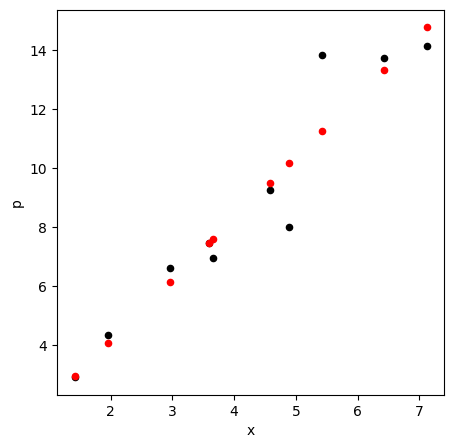

In [153]:
ax = df.plot.scatter(x="x", y="y", figsize=(5,5), color="k")
df.plot.scatter(x="x", y="p", color="r", ax=ax)

### Euclidean Distance between columns

- how close is the new vector (`P @ y`) to the original vector (`y`)?
- $dist$ = $\sqrt{(x2 - x1)^2 + (y2 - y1)^2}$

In [154]:
coords = pd.DataFrame({
    "v1": [1, 8],
    "v2": [4, 12],
}, index=["x", "y"])
coords

,v1,v2
x,1,4
y,8,12


In [155]:
# distance between v1 and v2 is 5
((coords["v1"] - coords["v2"]) ** 2).sum() ** 0.5 

5.0

In [156]:
# this is the smallest possible distance between y and p, such
# that X @ c = p is solveable
((df["y"] - df["p"]) ** 2).sum() ** 0.5

3.54897454563901

### Lab review

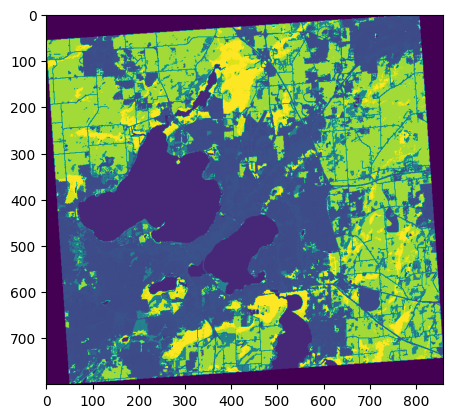

In [157]:
# As an exception, I am providing all the relevant import statements in this cell
import numpy as np
import rasterio
from rasterio.mask import mask
from shapely.geometry import box
import geopandas as gpd

land = rasterio.open("zip:land.zip!wi.tif")
# a = land.read()
window = gpd.GeoSeries([box(-89.5, 43, -89.2, 43.2)]).set_crs("epsg:4326").to_crs(land.crs)
plt.imshow(mask(land, window, crop=True)[0][0])